<a href="https://colab.research.google.com/github/plaban1981/Timeseries/blob/master/Auto_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is ARIMA?
ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

This is one of the easiest and effective machine learning algorithm to performing time series forecasting. 

This is the combination of Auto Regression and Moving average.

https://towardsdatascience.com/get-a-glimpse-of-future-using-time-series-forecasting-using-auto-arima-and-artificial-intelligence-273efabec6aa

#### AR part of ARIMA

Autoregression is a time series model that uses observations from previous time steps as input to the regression equation to predict the value at the next time step. 

In simple words, it performs regression in previous time step t-1 to predict t.

#### MA  part of ARIMA

MA stands for moving average which is also called as rolling mean. 

Basically, we are calculating the simple average in a particular time frame and dividing it with the total number of time frames taken.

## What is Auto-ARIMA?

Before training simple ARIMA model we have to figure out p(AR), q(MA), d(Back Timeshift) which is not as easy as fine-tuning other machine learning models. 

We have to reduce stationarity and get those values which so time-consuming as well as boring.


**Auto-ARIMA** uses brute force and tries different combinations of p, q, and d and then returns the best model after evaluation. 

It uses **mean squared error** to evaluate the best model. 

It also uses **Akaike Information Criteria (AIC)** and **Bayesian information criterion (BIC)** which are statistical measures of goodness of fit and the simplicity of the model.

In [1]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 2.8MB/s 


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


## Implementation of Auto-ARIMA in python

#### Problem Statement : Predict no of passengers in next month.

In [2]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [0]:
import pandas as pd
import numpy as np
from pyramid import auto_arima
#from pmdarima import auto_arima

In [33]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
df['Month'] = pd.to_datetime(df['Month'])

In [0]:
df.set_index('Month',inplace=True)

In [36]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Plotting the time series data is also important to see the trend and seasonality in data. 

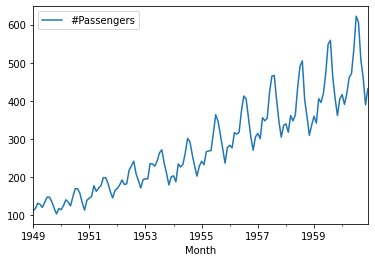

In [37]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

## Split the dataset

In [38]:
train = df[:int(0.8 * len(df))]
test = df[int(0.8 * len(df)):]

print(train.shape)
print(test.shape)

(115, 1)
(29, 1)


In [41]:
#training model
model = auto_arima(train, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
#fitting model
model.fit(train)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1076.519, BIC=1081.991, Fit time=0.010 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1064.624, BIC=1072.833, Fit time=0.059 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1061.078, BIC=1072.023, Fit time=0.082 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1053.366, BIC=1067.047, Fit time=0.286 seconds
Fit ARIMA: order=(0, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=1038.342, BIC=1054.760, Fit time=0.440 seconds
Fit ARIMA: order=(0, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=1038.250, BIC=1057.403, Fit time=0.522 seconds
Fit ARIMA: order=(0, 1, 6) seasonal_order=(0, 0, 0, 1); AIC=1036.019, BIC=1057.908, Fit time=0.607 seconds
Fit ARIMA: order=(0, 1, 7) seasonal_order=(0, 0, 0, 1); AIC=1036.387, BIC=1061.013, Fit time=0.800 seconds
Fit ARIMA: order=(0, 1, 8) seasonal_order=(0, 0, 0, 1); AIC=1024.444, BIC=1051.806, Fit time=0.828 seconds
Fit ARIMA: order=(0, 1, 9) seasonal_o

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(10, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [0]:
y_pred = model.predict(n_periods=len(test))

## Accuracy of prediction

In [43]:
from sklearn.metrics import r2_score
acc = r2_score(test.values,y_pred)
print(acc)

0.738373199953962


In [44]:
model = auto_arima(train)
model.fit(train)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters f

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend='c')

In [48]:
model.seasonal_order

(0, 0, 0, 1)

In [49]:
model.order

(3, 1, 3)

In [45]:
from sklearn.metrics import r2_score
acc = r2_score(test.values,y_pred)
print(acc)

0.738373199953962
